<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
upload = files.upload()

Saving my_matrix.xlsx to my_matrix.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(upload['my_matrix.xlsx']), index_col=[0], header=[0, 1, 2]) #index_col=[0,1,2]

In [ ]:
df = df.fillna(0)
df.head()

Produkt,Prod_1,Prod_2,Prod_3,Prod_4,Prod_5,Prod_6,Prod_7,Prod_8,Prod_9,Prod_10,Prod_11,Prod_12,Prod_13,Prod_14,Prod_15,Prod_16,Prod_17,Prod_18,Prod_19,Prod_20,Prod_21,Prod_22,Prod_23,Prod_24
Kode,409705,46014,18452,78604,323346,323347,323349,677018,32135,4248867,4241979,587326,324091,324093,324096,4253415,27458,18207,430243,18462,78606,4021726,4021725,13552
Group,Los,Los,Mas,Mas,Mas,Mas,Mas,Mas,Mas,Ing,Ing,Ing,Ing,Ing,Ing,Ing,Ing,Ing,Fyl,Fyl,Fyl,Fyl,Fyl,Fyl
Prod_1,0,60,15,20,45,45,45,45,50,60,60,60,60,60,60,60,75,60,240,240,240,240,240,240
Prod_2,60,0,15,20,45,45,45,45,50,60,60,60,60,60,60,60,75,60,240,240,240,240,240,240
Prod_3,60,60,0,20,45,45,45,45,50,60,60,60,60,60,60,60,75,60,240,240,240,240,240,240
Prod_4,60,60,20,0,45,45,45,45,50,60,60,60,60,60,60,60,75,60,240,240,240,240,240,240
Prod_5,60,60,45,45,0,15,15,15,15,60,20,20,20,20,20,20,35,20,240,240,240,240,240,240


In [ ]:
list(df.index)

['Prod_1',
 'Prod_2',
 'Prod_3',
 'Prod_4',
 'Prod_5',
 'Prod_6',
 'Prod_7',
 'Prod_8',
 'Prod_9',
 'Prod_10',
 'Prod_11',
 'Prod_12',
 'Prod_13',
 'Prod_14',
 'Prod_15',
 'Prod_16',
 'Prod_17',
 'Prod_18',
 'Prod_19',
 'Prod_20',
 'Prod_21',
 'Prod_22',
 'Prod_23',
 'Prod_24']

In [ ]:
#Option 1: Create a function to locate and return a value from the dataframe
def df_to_dict(df, arg1, arg2):
  return df.xs(arg1, axis=0, level=None)[arg2].to_dict()

my_dict = df_to_dict(df, 'Melkerull 10 Kg', 'Freia 148G Milk Roll 2 Pack')
#print(f'Kode = {kode}, Group = {group}, Time = {value}min')

for (kode, group), v in my_dict.items():
  print(kode, group, v)

78604 Massive 20.0


In [ ]:
#Download the file
from google.colab import files
df.to_excel('my_matrix.xlsx', index=True)
files.download('my_matrix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame to a file on the Colab backend.
with open('df.json', 'w') as f:
  f.write(df.to_json())

In [ ]:
#Download the file
from google.colab import files
files.download('df.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_json?

#Absentism

## Uploading packages and data

In [ ]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
#Customizing data visualization styles

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021_j4_skift.xlsx

In [ ]:
#Uploading file from local drive ==> !rm file
from google.colab import files
uploaded2 = files.upload()

Saving 2021_j4_skift.xlsx to 2021_j4_skift.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df2 = pd.read_excel(io.BytesIO(uploaded2['2021_j4_skift.xlsx']))

In [ ]:
#Checking dataframe info
df2.head()

,Date,Shift,Aas,Cha,Chr,Els,Evv,Far,Heg,Jir,Jør,Kim,Kri,Lai,Mad,Moh,Nat,Øyv,San,Sar,Ton,Omo,Vit,Sim,Sør,Comment
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Data cleaning and preparation

In [ ]:
#Eliminating missing data from the whole dataframe
df2 = df2[~df2['Aas'].isnull() == True].reset_index(drop=True)

In [ ]:
#Verifying missing data is gone
df2['Jør'].isnull().sum()

0

In [ ]:
#Checking the dataframe 
df2.tail()

,Date,Shift,Aas,Cha,Chr,Els,Evv,Far,Heg,Jir,Jør,Kim,Kri,Lai,Mad,Moh,Nat,Øyv,San,Sar,Ton,Omo,Vit,Sim,Sør,Comment
157,2021-04-22,Afternoon,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Sick_leave': ['Far'], 'Late': ['San'], 'Time..."
158,2021-04-22,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
159,2021-04-23,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Sick_leave': ['Moh'], 'Doctor': ['Ton']}"
160,2021-04-23,Afternoon,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{'Sick_leave': ['Far']}
161,2021-04-23,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
#Checking if all dates are present
df2['Date'].isnull().sum()

0

In [ ]:
#Extracting week number and day name from datetime column
df2 = df2.assign(Month = df2['Date'].dt.month_name(),
                 Weeknum = df2['Date'].dt.isocalendar().week, 
                 Day = df2['Date'].dt.day_name())
df2.head(2)

,Date,Shift,Aas,Cha,Chr,Els,Evv,Far,Heg,Jir,Jør,Kim,Kri,Lai,Mad,Moh,Nat,Øyv,San,Sar,Ton,Omo,Vit,Sim,Sør,Comment,Month,Weeknum,Day
0,2021-02-01,Day,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Sick': ['Far'], 'Leaves_early': ['Moh']}",February,5,Monday
1,2021-02-01,Afternoon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,{'Dentist': ['San']},February,5,Monday


In [ ]:
#Melting dataframe to plot stacked barplot
cols = list(df2.columns)[2:-4]
df2_melted = df2.melt(id_vars=['Date', 'Month', 'Weeknum', 'Day', 'Shift'], value_vars=cols, var_name= 'Name', value_name='Hours')
df2_melted.tail(7)

,Date,Month,Weeknum,Day,Shift,Name,Hours
3719,2021-04-21,April,16,Wednesday,Night,Sør,0.0
3720,2021-04-22,April,16,Thursday,Day,Sør,0.0
3721,2021-04-22,April,16,Thursday,Afternoon,Sør,0.0
3722,2021-04-22,April,16,Thursday,Night,Sør,0.0
3723,2021-04-23,April,16,Friday,Day,Sør,0.0
3724,2021-04-23,April,16,Friday,Afternoon,Sør,0.0
3725,2021-04-23,April,16,Friday,Night,Sør,0.0


In [ ]:
#Casting weeknum column to integer 64 data type
df2_melted['Weeknum'] = df2_melted['Weeknum'].astype(int)
df2_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3726 non-null   datetime64[ns]
 1   Month    3726 non-null   object        
 2   Weeknum  3726 non-null   int64         
 3   Day      3726 non-null   object        
 4   Shift    3726 non-null   object        
 5   Name     3726 non-null   object        
 6   Hours    3726 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 203.9+ KB


In [ ]:
#Slicing the data to calculate the cumulative lost hours by name
abs = pd.DataFrame(df2.iloc[:, 2:-3].sum().sort_values(ascending=False), columns=['Hours']).reset_index().rename(columns={'index': 'Names'})
abs

,Names,Hours
0,Far,424.0
1,Moh,336.0
2,Ton,97.0
3,Mad,90.5
4,Els,50.0
5,Chr,40.0
6,Omo,32.0
7,Aas,28.0
8,Sar,24.0
9,Lai,18.0


## Function to plot cumulative lost hours

In [ ]:
#Function to plot the missing hours by day
def plot_abs():
  """Plot missing hours"""

  #Creating subplots and unpacking axes immediately
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10,20))

  fig.suptitle('Lost hours by unplanned labor abscence')

  #Plotting for each axes
  sns.barplot(x='Shift', y='Hours', data=df2_melted, estimator=sum, ci=False, ax=ax1)
  sns.barplot(x='Day', y='Hours', data=df2_melted, estimator=sum, ci=False, ax=ax2)
  sns.lineplot(x='Weeknum', y='Hours', data=df2_melted, estimator=sum, ci=False, ax=ax3)
  sns.barplot(x='Name', y='Hours', data=df2_melted, estimator=sum, ci=False, ax=ax4)
  
  #Customizing first axis labels and titles
  ax1.set_title('by Shift')
  ax1.set_xlabel('Shift')
  ax1.set_ylabel('Hours')
  
  #Customizing second axis labels and titles
  ax2.set_title('by Day of Week')
  ax2.set_xlabel('Weeknum')
  ax2.set_ylabel('Hours')

  #Customizing third axis labels and titles
  ax3.set_title('by Week of year')
  ax3.set_xlabel('Weeknum')
  ax3.set_ylabel('Hours')

  #Customizing forth axis labels and titles
  ax4.set_title('by Name')
  ax4.set_xlabel('Name')
  ax4.set_ylabel('Hours')

  #Prevent from axes to colliding or overlaping one another.  
  fig.tight_layout()
  fig.subplots_adjust(top=0.88)

##Plotting cumulative lost hours

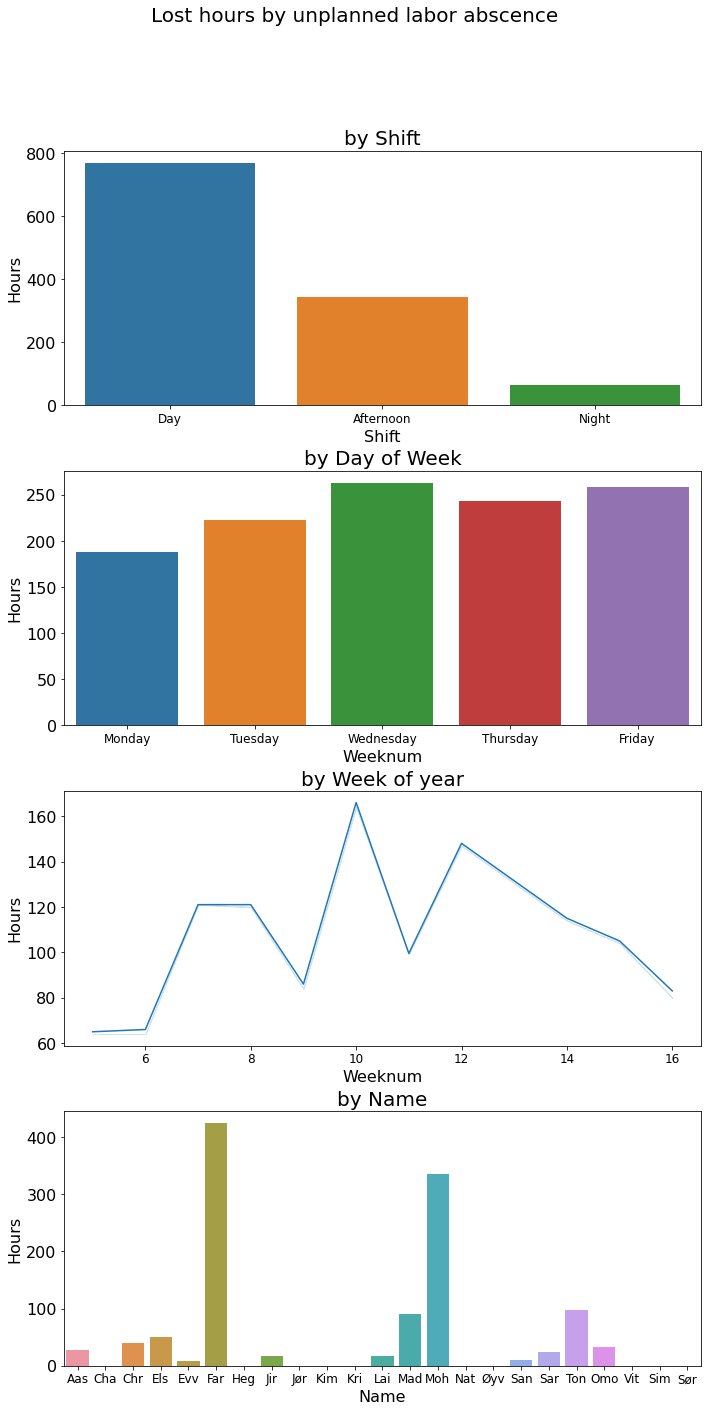

In [ ]:
#Plotting the missing hours
plot_abs()
plt.show()

##Function for plotting lost hours by name

In [ ]:
#Function to plot the missing hours by day
def plot_by_name(name):
  """Plot lost hours by name"""

  #Creating subplots and unpacking axes immediately
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10,20))

  df = df2_melted[df2_melted['Name']==name].copy()

  fig.suptitle(f'Unplanned labor abscence by {name}')

  #Plotting for each axes
  sns.barplot(x='Shift', y='Hours', data=df, estimator=sum, ci=False, ax=ax1)
  sns.barplot(x='Day', y='Hours', data=df, estimator=sum, ci=False, ax=ax2)
  sns.lineplot(x='Weeknum', y='Hours', data=df, estimator=sum, ci=False, ax=ax3)
  sns.barplot(x='Name', y='Hours', data=df, estimator=sum, ci=False, ax=ax4)
  
  #Customizing first axis labels and titles
  ax1.set_title('by Shift')
  ax1.set_xlabel('Shift')
  ax1.set_ylabel('Hours')
  
  #Customizing second axis labels and titles
  ax2.set_title('by Day of Week')
  ax2.set_xlabel('Weeknum')
  ax2.set_ylabel('Hours')

  #Customizing third axis labels and titles
  ax3.set_title('by Week of year')
  ax3.set_xlabel('Weeknum')
  ax3.set_ylabel('Hours')

  #Customizing forth axis labels and titles
  ax4.set_title('by Name')
  ax4.set_xlabel('Name')
  ax4.set_ylabel('Hours')

  #Prevent from axes to colliding or overlaping one another.  
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)

## Plotting lost hours by name

In [ ]:
#Generating widgets options
names = list(df2.iloc[:, 2:-3])

#Plotting unplanned labor losses by name with interactive widgets
interact(plot_by_name, name=widgets.Dropdown(options=names, value=lines[0], description='Names', disabled=False))
plt.show()